In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%run -i ../notebooks/functions/functions.py
%run -i ../notebooks/functions/ML_functions.py

In [4]:
master_df = pd.read_csv('../processed_data/master.csv')
lat_lng = master_df.iloc[:, 0:2]

In [5]:
master_df.describe()

,NTA_lat,NTA_long,Population,traffic,buildings,legalstories,rating,price,rest_insp_score,density/p_meter,acres,wellbeing/hotels,wellbeing/libraries,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,40.721129,-73.920450,42288.789744,609.260338,274.717949,2.939207,3.401641,1.831179,23.308602,73.164103,158.091360,14.005128,1.107692,11.610256,5.707692,6.107692,7.769231
std,0.091022,0.101162,21879.002411,607.221587,465.368137,2.544228,0.594936,0.165561,6.660529,75.692567,342.457524,60.830549,0.706153,8.741529,6.577194,5.746688,4.738859
min,40.525528,-74.233554,418.000000,29.439815,8.000000,1.000000,2.480000,1.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.652996,-73.974395,26518.000000,290.000000,70.000000,1.000000,2.810000,1.720000,19.468284,23.500000,9.095500,0.000000,1.000000,6.000000,2.000000,2.000000,4.000000
50%,40.718338,-73.916821,36891.000000,343.050926,70.000000,2.417840,3.460000,1.840000,22.620926,54.000000,28.462000,2.000000,1.000000,10.000000,4.000000,4.000000,7.000000
75%,40.789101,-73.855079,53896.000000,670.030671,152.500000,3.464321,3.990000,1.950000,26.620635,101.500000,152.665000,5.000000,1.000000,15.500000,6.000000,9.000000,11.000000
max,40.899535,-73.711025,132378.000000,3993.351852,2946.000000,26.875000,4.290000,2.400000,61.068966,542.000000,2913.103000,469.000000,4.000000,68.000000,59.000000,31.000000,21.000000


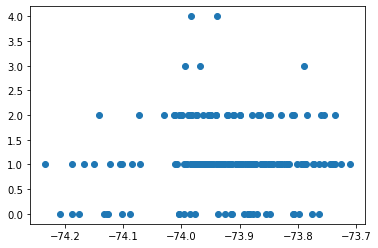

In [6]:
fig, axes = plt.subplots()

axes.scatter(master_df.NTA_long, master_df['wellbeing/libraries'])

In [7]:
outliers = master_df.loc[master_df['acres'] > 1000]
outliers

,NTA_lat,NTA_long,Population,traffic,buildings,legalstories,rating,price,rest_insp_score,density/p_meter,acres,wellbeing/hotels,wellbeing/libraries,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
45,40.899535,-73.906985,27860.0,370.125000,218.0,4.596330,3.93,1.76,16.533333,18.0,1227.747,2.0,1.0,15.0,15.0,1.0,1.0
51,40.614580,-73.915246,45231.0,516.969907,119.0,2.100840,2.88,1.84,17.345679,27.0,1714.092,0.0,0.0,5.0,3.0,1.0,2.0
132,40.586560,-74.132975,30714.0,564.324074,76.0,2.197368,4.12,1.70,10.000000,0.0,1368.895,0.0,0.0,4.0,4.0,4.0,6.0
158,40.846597,-73.806493,26583.0,290.000000,81.0,2.061728,3.42,1.68,16.730769,0.0,2913.103,0.0,2.0,2.0,1.0,0.0,1.0
172,40.594060,-73.789621,36885.0,442.000000,53.0,2.094340,3.04,1.84,22.000000,3.0,1358.974,2.0,3.0,11.0,2.0,4.0,11.0
174,40.595865,-74.176365,39597.0,2468.693287,142.0,2.147887,3.97,1.72,18.292453,0.0,1701.924,5.0,0.0,6.0,5.0,1.0,4.0


In [8]:
outliers_zip = lat_long_zip(outliers)
NTA_zip = lat_long_zip(lat_lng)

<AxesSubplot:>

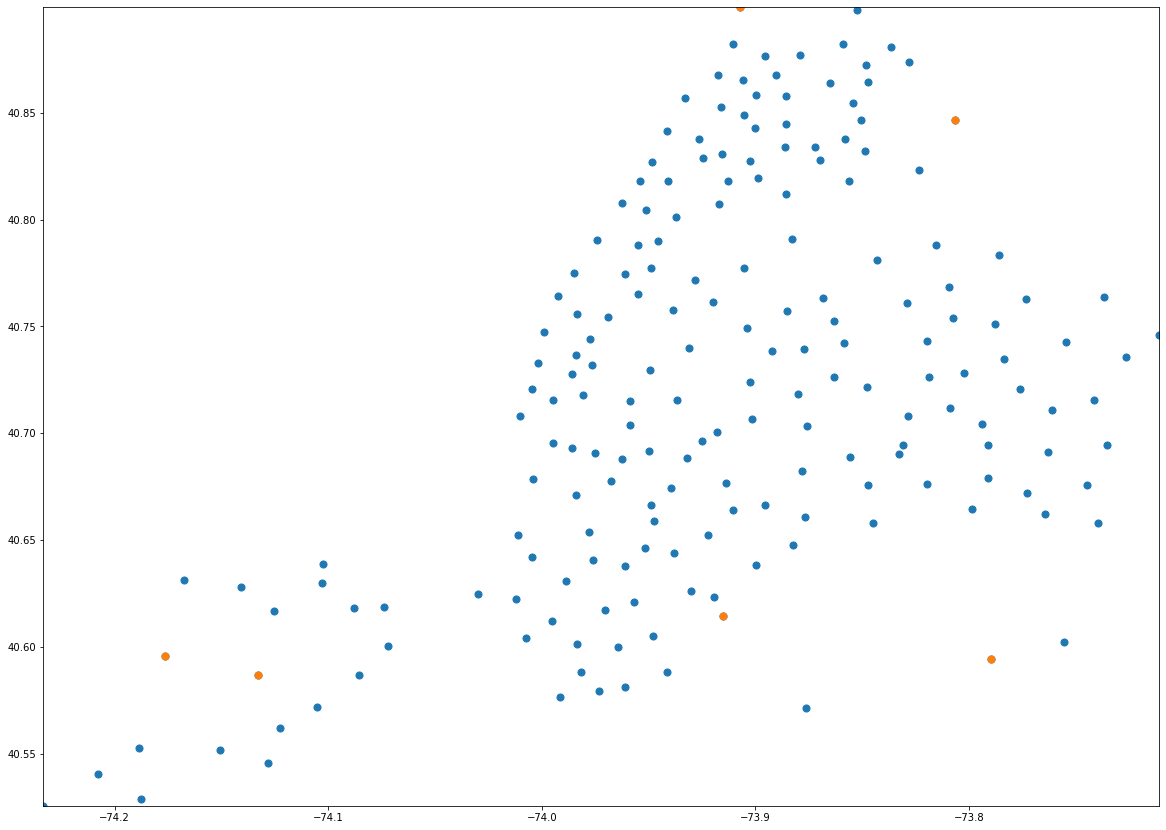

In [9]:
fig,ax=plt.subplots(figsize=(20,20))

ax.set_xlim(min(lat_lng['NTA_long']), max(lat_lng['NTA_long']))
ax.set_ylim(min(lat_lng['NTA_lat']), max(lat_lng['NTA_lat']))
#loop through each cluster
NTA_zip.plot(ax = ax, markersize = 50, marker = 'o', label = 'NTA')
outliers_zip.plot(ax = ax, markersize = 50, marker = 'o', label = 'outliers')

In [10]:
#eliminating outliers
master_df.loc[master_df['legalstories'] > 25, 'legalstories'] = 10
master_df.loc[master_df['traffic'] > 3000, 'traffic'] = 2500
master_df.loc[master_df['Population'] > 120000, 'Population'] = 120000
master_df.loc[master_df['DAY CARE'] > 60, 'DAY CARE'] = 45
master_df.loc[master_df['NON-PUBLIC K-12 SCHOOLS'] > 25, 'NON-PUBLIC K-12 SCHOOLS'] = 25
master_df.loc[master_df['HOSPITALS AND CLINICS'] > 30, 'HOSPITALS AND CLINICS'] = 25
master_df.loc[master_df['rest_insp_score'] > 15000, 'rest_insp_score'] = 13000
master_df.loc[master_df['density/p_meter'] > 500, 'density/p_meter'] = 350
master_df.loc[master_df['acres'] > 1000, 'acres'] = 1000
master_df.loc[master_df['wellbeing/hotels'] > 100, 'wellbeing/hotels'] = 100

In [11]:
master_df.describe()

,NTA_lat,NTA_long,Population,traffic,buildings,legalstories,rating,price,rest_insp_score,density/p_meter,acres,wellbeing/hotels,wellbeing/libraries,DAY CARE,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,40.721129,-73.920450,42225.312821,595.107512,274.717949,2.852669,3.401641,1.831179,23.308602,72.179487,136.118360,7.348718,1.107692,11.492308,5.405128,6.076923,7.769231
std,0.091022,0.101162,21632.853201,543.101634,465.368137,1.941481,0.594936,0.165561,6.660529,70.642804,232.240394,18.168496,0.706153,8.109031,4.808173,5.627549,4.738859
min,40.525528,-74.233554,418.000000,29.439815,8.000000,1.000000,2.480000,1.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.652996,-73.974395,26518.000000,290.000000,70.000000,1.000000,2.810000,1.720000,19.468284,23.500000,9.095500,0.000000,1.000000,6.000000,2.000000,2.000000,4.000000
50%,40.718338,-73.916821,36891.000000,343.050926,70.000000,2.417840,3.460000,1.840000,22.620926,54.000000,28.462000,2.000000,1.000000,10.000000,4.000000,4.000000,7.000000
75%,40.789101,-73.855079,53896.000000,670.030671,152.500000,3.464321,3.990000,1.950000,26.620635,101.500000,152.665000,5.000000,1.000000,15.500000,6.000000,9.000000,11.000000
max,40.899535,-73.711025,120000.000000,2500.000000,2946.000000,11.896396,4.290000,2.400000,61.068966,357.000000,1000.000000,100.000000,4.000000,49.000000,25.000000,25.000000,21.000000


In [12]:
#save to csv
master_df.to_csv('../processed_data/master.csv', index=False, encoding='utf-8')